In [13]:
cd C:\Users\Amer Fares\Downloads\investigate-a-dataset-template.ipynb

C:\Users\Amer Fares\Downloads\investigate-a-dataset-template.ipynb


> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No show appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each              row.
>
> ● **‘ScheduledDay’** tells us on what day the patient set up their appointment.
>
> ● **‘Neighborhood’** indicates the location of the hospital.
>
> ● **‘Scholarship’** indicates whether or not the patient is enrolled in Brazilian welfare program Bolsa Família.
>
> **● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up**


In [14]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# characteristsics of dataset "columns and rows" of the mentioned dataset
df.shape

(110527, 14)

In [17]:
# showing information about dataset datatypes and how may null values in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> clearly appear that there is no missing data

In [19]:
df.duplicated().sum()

0

> there is no any duplicated data also

In [20]:
df['PatientId'].nunique()

62299

> Number of unique patients are only 62299

In [21]:
df['PatientId'].duplicated().sum()

48228

> Number of patient who got more than appointments are 48228

In [23]:
df.duplicated(['PatientId', 'No-show']).sum()

38710

> 38710 patiend Ids are duplicated

In [15]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

> places where customer can attend the appiontment

In [16]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

> gender clasifcation

In [37]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

> if the patient attend the appointment then the answer is no and if he did not attened then the answer is yes

In [22]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **mean age is 37 years old and maximum age is 115 years old and the minmum age is -1 years old that is must be wrong**

In [32]:
# defining the rows with wrong data that must be cleaned 

minusone= df.query('Age==-1')
minusone

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> Row with index 99832 hold age minus one that must be cleaned 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [33]:
# removing the row holding value of minus one 
df.drop(index=99832, inplace=True)

In [35]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> minmum age now is corrected 

In [38]:
# renaming the column no-show to easy us it in coding
df.rename(columns={'No-show': 'No_show'}, inplace=True)

In [39]:
# renaming Hypertension column name as it written in a wrong way "Hipertension"
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

In [41]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
# Deleting Duplicated Ids with the same value of showing
df.drop_duplicates(['PatientId', 'No_show'], inplace=True)
df.shape

(71816, 14)

In [43]:
# Removing Unneessary column data 
df.drop(['ScheduledDay', 'AppointmentID', 'AppointmentDay'], axis = 1, inplace = True )
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Histogramming the Data to see it

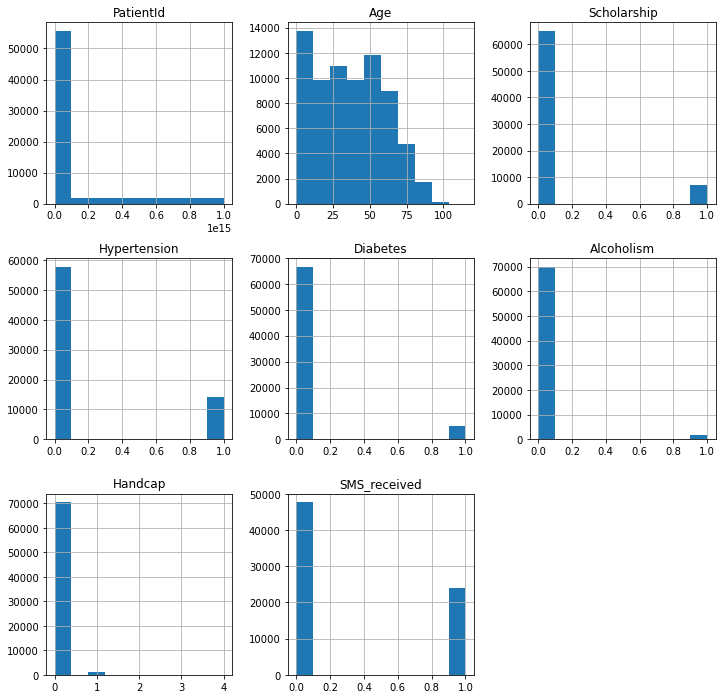

In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
# histogram of all data
df.hist(figsize= (12, 12));

In [45]:
(df.Scholarship ==1).sum()
# patients have a scholarship

6861

In [46]:
(df.Hypertension ==1).sum()
# patients suffer from Hypertension

14009

In [47]:
(df.Diabetes ==1).sum()
# patients suffer from Diabetes

5096

In [48]:
(df.Alcoholism ==1).sum()
# patients suffer from Alcholism

1798

In [49]:
(df.Handcap ==1).sum()
# patients are handcap

1178

In [50]:
(df.SMS_received ==1).sum()
# patients received SMS

24099

In [51]:
(df.No_show == 'No').sum()
# patients has been show

54153

In [49]:
(df.No_show == 'Yes').sum()
# patients has not been show

22319

>only 6861 of patients have a scholarship 

> only 14009 of patients suffers from Hypertension

> only 5096 of patients suffers from Diabetes 

> only 1798 of patients are Alcoholism 

> only 1178 of patients are Handcap 

> only 24099 patients received SMS and the other didnot

> 54153 patients has been shown and 22319 has not been shown

In [53]:
# two main group of people who attend and do not attend 
attend = df.No_show == 'No'
donotattend = df.No_show == 'Yes'
df[attend].count(),df[donotattend].count()

(PatientId        54153
 Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 PatientId        17663
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

> only 54123 patients are shown and the others not

## parameters Effects On each Others

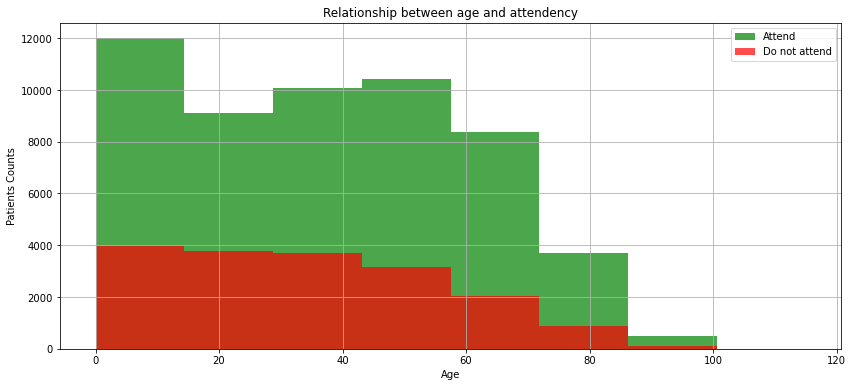

In [65]:
# What is the relationship between attendency and age

def attendency(df, col_name, shown, no_shown):
    
    plt.figure(figsize=[14,6])
    df[col_name][attend].hist(alpha=0.7, bins=8, color='green', label='Attend')
    df[col_name][donotattend].hist(alpha=0.7, bins=8, color='red', label='Do not attend')
    plt.legend();
    plt.title('Relationship between age and attendency')
    plt.xlabel('Age')
    plt.ylabel('Patients Counts');
attendency(df, 'Age', attend, donotattend)

> the histogram is bimodal on age from 0 to 15 and from age between 40 to 60 (the most shown categories)

> from age 60 and older are the most unshown categories 

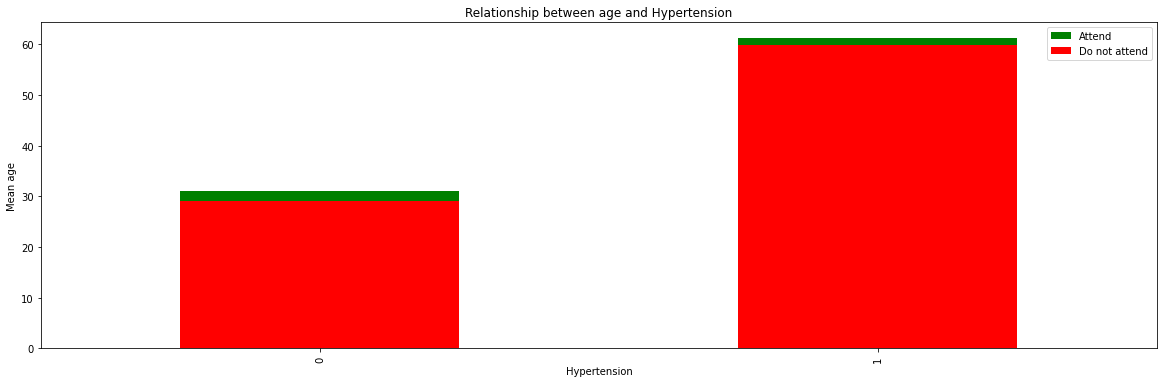

In [68]:
# What is the relationship between attendency and hypertension in lower and higher ages?


    
plt.figure(figsize=[20,6])
df[attend].groupby(['Hypertension']).mean()['Age'].plot(kind='bar', color='green', label='Attend')
df[donotattend].groupby(['Hypertension']).mean()['Age'].plot(kind='bar', color='red', label='Do not attend')
plt.legend();
plt.title('Relationship between age and Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Mean age');


> patients with higher ages who suffers from hypertension lean to not attend 

> patients with lower ages who suffers from hypertension lean to not attend also

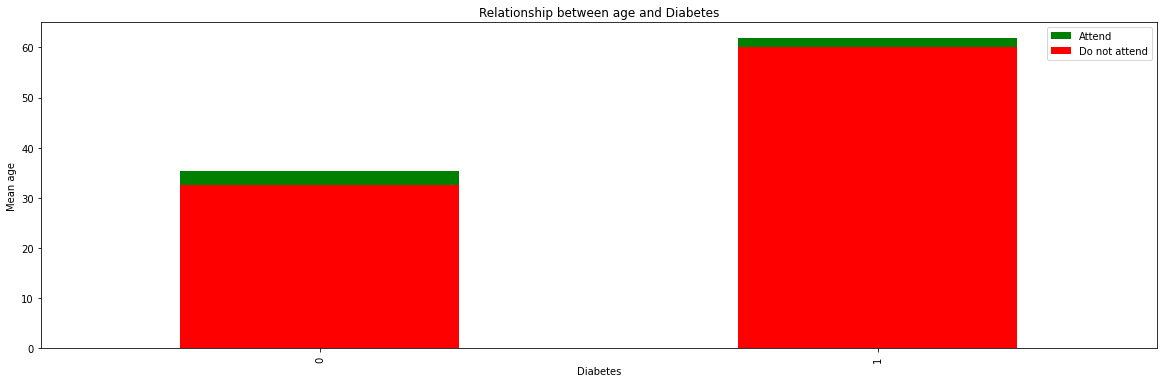

In [69]:
# What is the relationship between attendency and Diabetes in lower and higher ages?


    
plt.figure(figsize=[20,6])
df[attend].groupby(['Diabetes']).mean()['Age'].plot(kind='bar', color='green', label='Attend')
df[donotattend].groupby(['Diabetes']).mean()['Age'].plot(kind='bar', color='red', label='Do not attend')
plt.legend();
plt.title('Relationship between age and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Mean age');

> patients with higher ages who suffers from Diabetes lean to not attend 

> patients with lower ages who suffers from Diabetes lean to not attend also

> chronic diseases do not affect the lean to attend or not

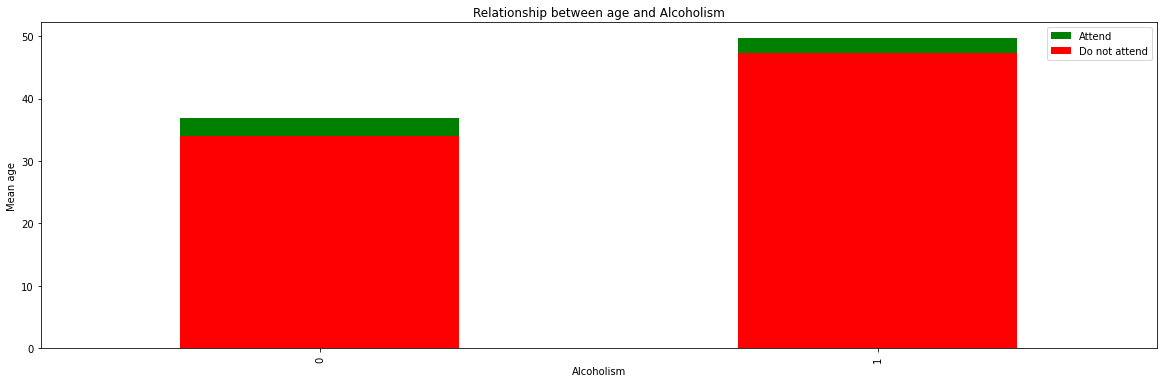

In [72]:
# What is the relationship between attendency and Alcoholism in lower and higher ages?


    
plt.figure(figsize=[20,6])
df[attend].groupby(['Alcoholism']).mean()['Age'].plot(kind='bar', color='green', label='Attend')
df[donotattend].groupby(['Alcoholism']).mean()['Age'].plot(kind='bar', color='red', label='Do not attend')
plt.legend();
plt.title('Relationship between age and Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Mean age');

> patients with higher ages who are Alcoholism  lean to not attend 

> patients with lower ages who are Alcoholism lean to not attend also


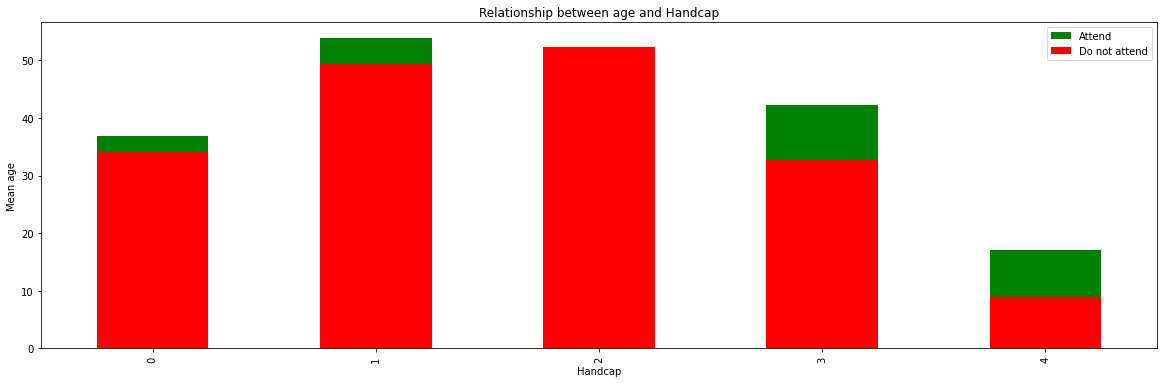

In [74]:
# What is the relationship between attendency and Handcap in lower and higher ages?
    
plt.figure(figsize=[20,6])
df[attend].groupby(['Handcap']).mean()['Age'].plot(kind='bar', color='green', label='Attend')
df[donotattend].groupby(['Handcap']).mean()['Age'].plot(kind='bar', color='red', label='Do not attend')
plt.legend();
plt.title('Relationship between age and Handcap')
plt.xlabel('Handcap')
plt.ylabel('Mean age');

> patients with higher ages who are Handcap = 2 do not attend at all 
 
> patients with higher ages who are Handcap = 1 lean to not attend  

> patients with lower ages who are Handcap= 4 aproximatlly half of them attend


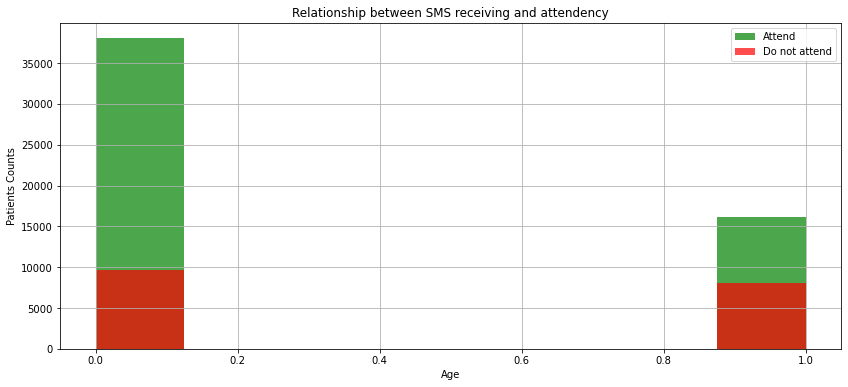

In [76]:
# What is the relationship between attendency and SMS receiving

def attendency(df, col_name, shown, no_shown):
    
    plt.figure(figsize=[14,6])
    df[col_name][attend].hist(alpha=0.7, bins=8, color='green', label='Attend')
    df[col_name][donotattend].hist(alpha=0.7, bins=8, color='red', label='Do not attend')
    plt.legend();
    plt.title('Relationship between SMS receiving and attendency')
    plt.xlabel('Age')
    plt.ylabel('Patients Counts');
attendency(df, 'SMS_received', attend, donotattend)

> there is a strange negative correlation between attendency and receiving SMS 

> poeple who Received SMS is lower than people who do not receive 

> SMS center have an issue must be solved 

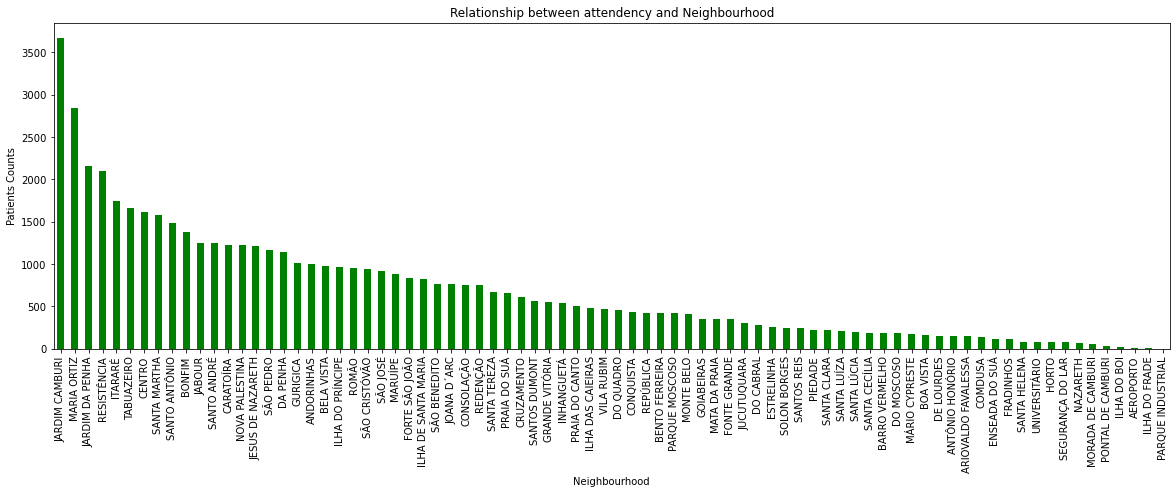

In [81]:
# What is the relationship between attendency and Neighbourhood ?
    
plt.figure(figsize=[20,6])
df.Neighbourhood[attend].value_counts().plot(kind='bar', color='green', label='Attend')
plt.title('Relationship between attendency and Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Counts');

> JARDIM CAMBURI Neighbourhood is the highest level of attenncy and PARQUE INDUSTRIAL Neighbourhood is the lowest

<a id='conclusions'></a>
## Conclusions

> •	only 6861 of patients have a scholarship

> •	only 14009 of patients suffers from Hypertension

> •	only 5096 of patients suffers from Diabetes

> •	only 1798 of patients are Alcoholism

> •	only 1178 of patients are Handcap

> •	only 24099 patients received SMS and the other didnot

> •	54153 patients has been shown and 22319 has not been shown

> •	only 54123 patients are shown and the others not

> •	the histogram is bimodal on age from 0 to 15 and from age between 40 to 60 (the most shown categories)

> •	from age 60 and older are the most unshown categories

> •	patients with higher ages who suffers from hypertension lean to not attend

> •	patients with lower ages who suffers from hypertension lean to not attend also

> •	patients with higher ages who suffers from Diabetes lean to not attend

> •	patients with lower ages who suffers from Diabetes lean to not attend also

> •	chronic diseases do not affect the lean to attend or not

> •	patients with higher ages who are Alcoholism lean to not attend

> •	patients with lower ages who are Alcoholism lean to not attend also

> •	patients with higher ages who are Handcap = 2 do not attend at all

> •	patients with higher ages who are Handcap = 1 lean to not attend

> •	patients with lower ages who are Handcap= 4 aproximatlly half of them attend

> •	there is a strange negative correlation between attendency and receiving SMS

> •	poeple who Received SMS is lower than people who do not receive

> •	SMS center have an issue must be solved

> •	JARDIM CAMBURI Neighbourhood is the highest level of attendance and ARQUE  NDUSTRIAL Neighbourhood is the lowest


## Limitation 

> the is no any correlation betwee age and any sicks or disorders affect attendency


In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

### Research Question 2  (Replace this header name!)